In [ ]:
# from google.colab import drive 
# drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1]:
from zipfile import *
file_name = 'German_Traffic.zip'

with ZipFile(file_name, 'r') as zipe:
    zipe.extractall()
    print('Done')

Done


In [3]:
# Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os
import seaborn as sns
import logging
logging.disable(logging.WARNING) 
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

# **Here we plot the Training data**

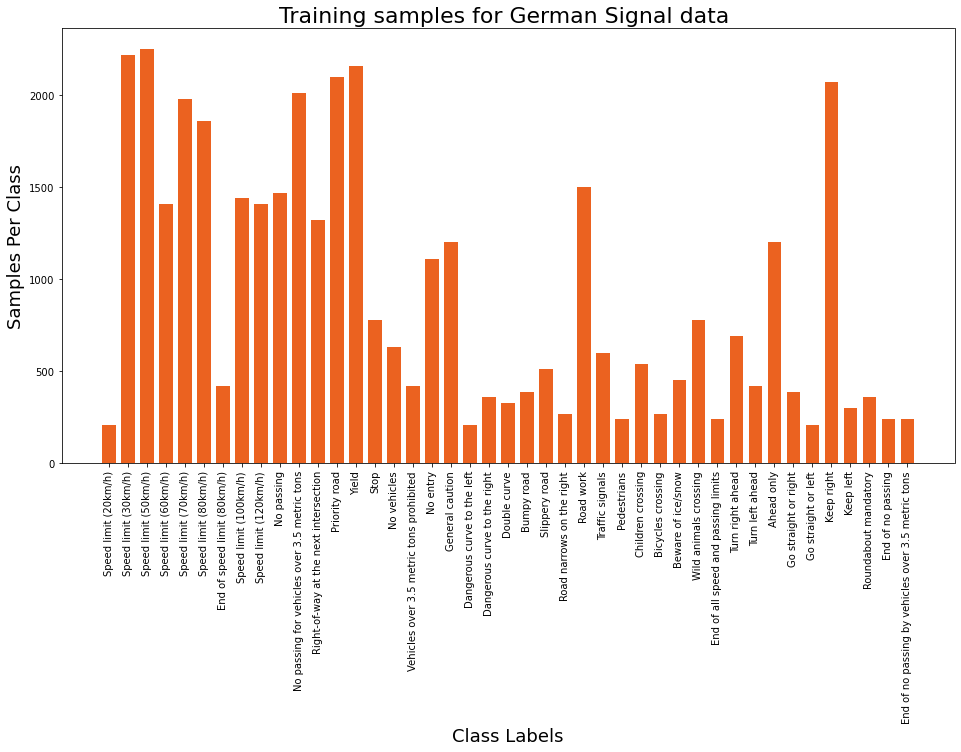

In [12]:
path_path="German_Traffic/Train/"
signnames=pd.read_csv('signnames.csv')
signNames=signnames.SignName.to_list()
signNumbers=[]
for cls in range(len(os.listdir(path_path))):
  signNumbers.append(len(os.listdir("German_Traffic/Train/{0}".format(cls))))
fig = plt.figure(figsize = (16, 8)) 
plt.bar(signNames,signNumbers,  color ='#EB6220',  
        width = 0.7) 
  
plt.xlabel("Class Labels",fontsize=18) 
plt.ylabel("Samples Per Class",fontsize=18) 
plt.title("Training samples for German Signal data ",fontsize=22) 
plt.xticks(rotation=90)
plt.show()

## **Here we print a sample image for each of the 43 classes**

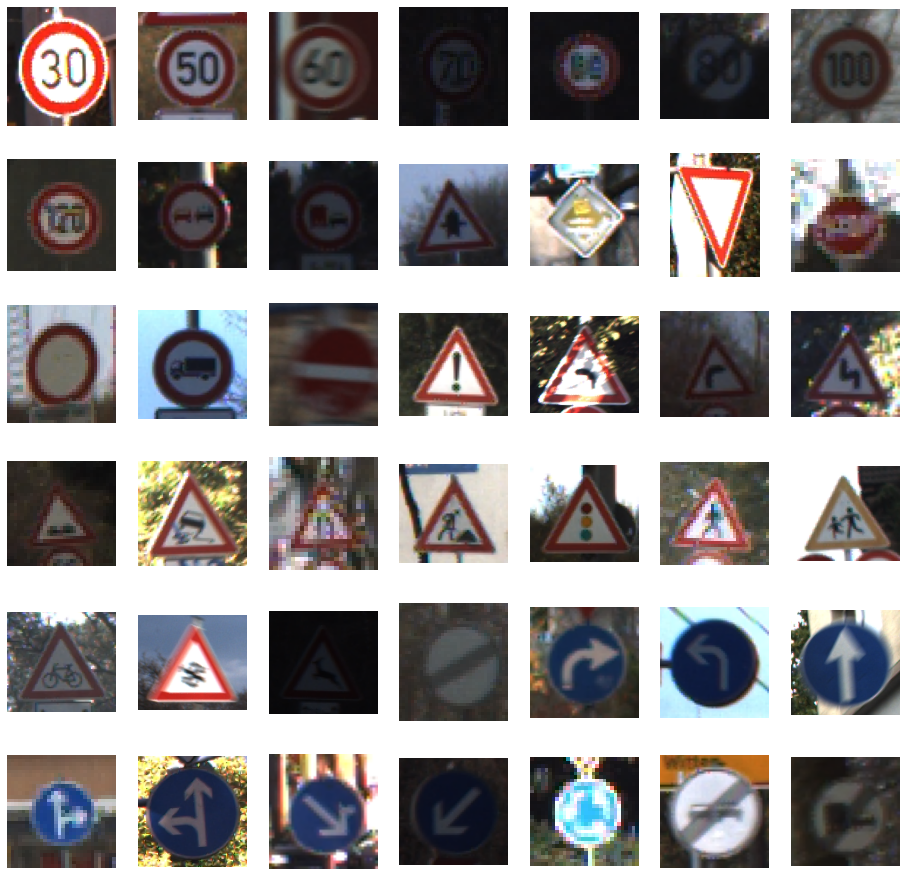

In [ ]:
w=12
h=12
fig=plt.figure(figsize=(16, 16))
columns = 7
rows = 6
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    path=("German_Traffic/Train/{}".format(i))
    plt.imshow(plt.imread(path+'/'+os.listdir(path)[1]))
    plt.axis('off')   
plt.show()

# **Load the Data**

In [ ]:
data=[]
labels=[]
height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width*channels
for i in range(classes) :
    path = "German_Traffic/Train/{0}/".format(i)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" error ")
            
Cells=np.array(data)
labels=np.array(labels)

In [ ]:
len(data)46

39209

# **Data Augmentation**

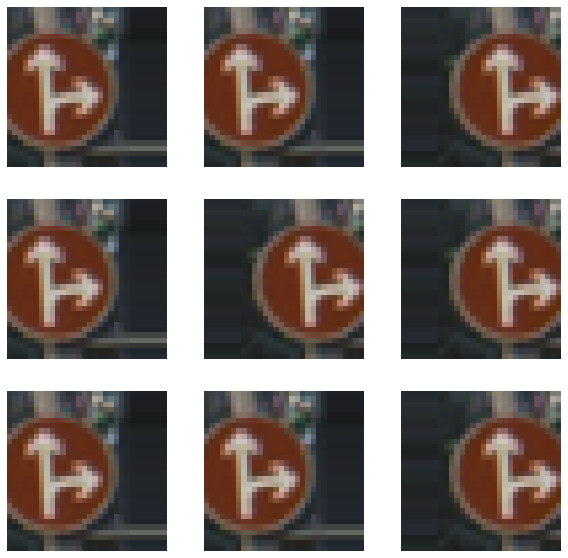

In [ ]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# convert to numpy array
data1 = data[35690]
# expand dimension to one sample
samples = expand_dims(data1, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-6,6])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
fig=plt.figure(figsize=(10, 10))
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image)
    plt.axis('off') 
  # show the figure
plt.show()

# **Randomize the order of the input images**
Bellow we Use the Numpy shaffle mothod to shaffle the data

In [ ]:
s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

# **Spliting the images into train and validation sets**

In [ ]:
(X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

#### **Here we use the Keras  numpy utility library to Convert the class vectors (integers) to binary class matrix.**

In [ ]:
#Using one hote encoding for the train and validation labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

# Here You should put some title ot something

In [ ]:
# ResNet should be enough but if you want you can change with Mask R-CNN
from keras.models import Model  

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.applications import ResNet50

from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(ResNet50(include_top = True,weights= 'imagenet' ))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

102973440/102967424 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1000)              25636712  
_________________________________________________________________
dense (Dense)                (None, 1024)              1025024   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0

In [ ]:
#using five epochs for the training and saving the accuracy for each epoch
epochs = 40
history = model.fit(X_train, y_train, batch_size=100, epochs=epochs,
validation_data=(X_val, y_val))

Epoch 1/40
314/314 [==============================] - 22s 70ms/step - loss: 2.1896 - accuracy: 0.2804 - val_loss: 2.8828 - val_accuracy: 0.2168
Epoch 2/40
314/314 [==============================] - 20s 65ms/step - loss: 1.4942 - accuracy: 0.4514 - val_loss: 1.7114 - val_accuracy: 0.4627
Epoch 3/40
314/314 [==============================] - 21s 66ms/step - loss: 1.0306 - accuracy: 0.5817 - val_loss: 1.0284 - val_accuracy: 0.6238
Epoch 4/40
314/314 [==============================] - 20s 65ms/step - loss: 0.8608 - accuracy: 0.6558 - val_loss: 0.7092 - val_accuracy: 0.7384
Epoch 5/40
314/314 [==============================] - 20s 64ms/step - loss: 0.6512 - accuracy: 0.7609 - val_loss: 2.2760 - val_accuracy: 0.5850
Epoch 6/40
314/314 [==============================] - 20s 65ms/step - loss: 0.4554 - accuracy: 0.8446 - val_loss: 0.6968 - val_accuracy: 0.7942
Epoch 7/40
314/314 [==============================] - 20s 65ms/step - loss: 0.3291 - accuracy: 0.8907 - val_loss: 0.3233 - val_accuracy:

In [ ]:
# Signal_model=pd.DataFrame(model.history.history)

In [ ]:

# Signal_model.to_csv('/content/gdrive/My Drive/Dash/Signal_model32.csv')
# model.save('/content/gdrive/My Drive/Dash/Signal_model32.h5')



In [ ]:
model_df=pd.read_csv('Signal_model40.csv',index_col=0 )
model = load_model('Signal_model40.h5') 

In [ ]:
model_df.tail()

,loss,accuracy,val_loss,val_accuracy
35,0.098484,0.979183,0.141412,0.969902
36,0.076674,0.984188,0.158707,0.968626
37,0.034985,0.991966,0.045201,0.992348
38,0.018065,0.996174,0.044109,0.992986
39,0.016939,0.997354,0.034764,0.993751


In [ ]:
model_df.rename(columns={'loss':'Training loss','val_loss':'Validation loss',
                   'accuracy':'Training accuracy','val_accuracy':'Validation accuracy',}, inplace=True)
losses= model_df[["Training loss","Validation loss"]] 
accuracies=model_df[["Training accuracy","Validation accuracy"]]

# **Plot the Traing and validation accuracies**

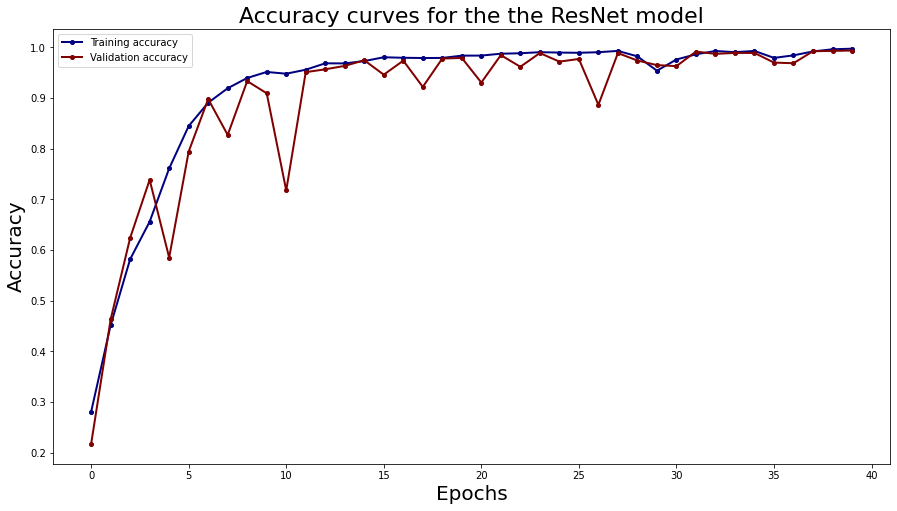

In [ ]:
plt.rcParams["figure.figsize"] = (15,8)
ax = accuracies.plot(lw=2,colormap='jet',marker='.',markersize=8)
ax.set_title('Accuracy curves for the the ResNet model', fontsize=22)
ax.set_xlabel('Epochs', fontsize=20)
ax.set_ylabel('Accuracy', fontsize=20)
plt.show()

# **Plot the Traing and validation losses**

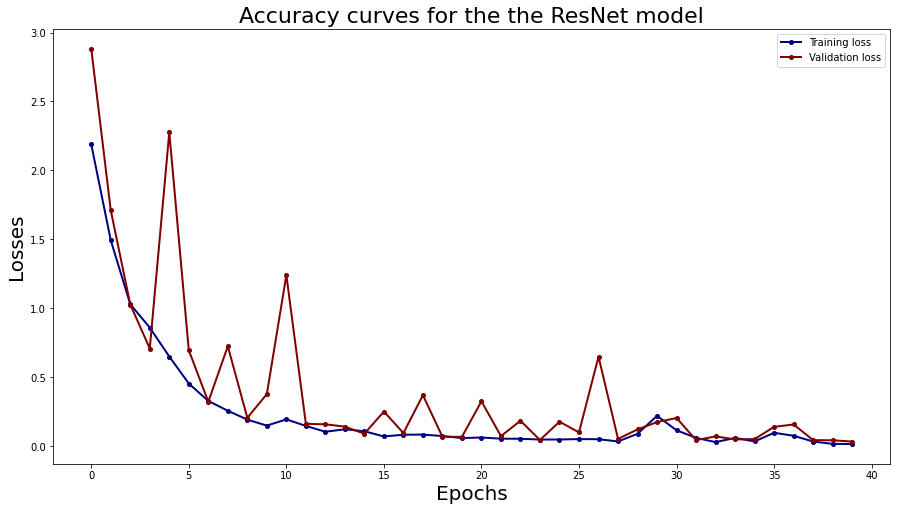

In [ ]:
ax = losses.plot(lw=2,colormap='jet',marker='.',markersize=8)
ax.set_title('Accuracy curves for the the ResNet model', fontsize=22)
ax.set_xlabel('Epochs', fontsize=20)
ax.set_ylabel('Losses', fontsize=20)
plt.show()

# **Predicting on the test data**

In [ ]:
y_test=pd.read_csv("German_Traffic/Test.csv")
labels=y_test['Path'].to_numpy() 
y_test=y_test['ClassId'].values

data=[]
for f in labels:
    image=cv2.imread('German_Traffic/Test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255 
pred = model.predict_classes(X_test)


# **Test Accuracy**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
accuracy_score(y_test, pred)

0.9510688836104513

## **Classification_report**

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        60
           1       0.97      0.98      0.98       720
           2       0.98      0.99      0.98       750
           3       0.94      0.95      0.94       450
           4       0.98      0.97      0.97       660
           5       0.90      0.96      0.93       630
           6       1.00      0.76      0.86       150
           7       0.99      0.83      0.91       450
           8       0.83      0.93      0.88       450
           9       0.92      1.00      0.96       480
          10       0.99      0.97      0.98       660
          11       0.93      0.97      0.95       420
          12       1.00      0.97      0.99       690
          13       0.98      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       1.00      1.00      1.00       210
          16       0.98      1.00      0.99       150
          17       0.98    

# **Confusion Matrix**

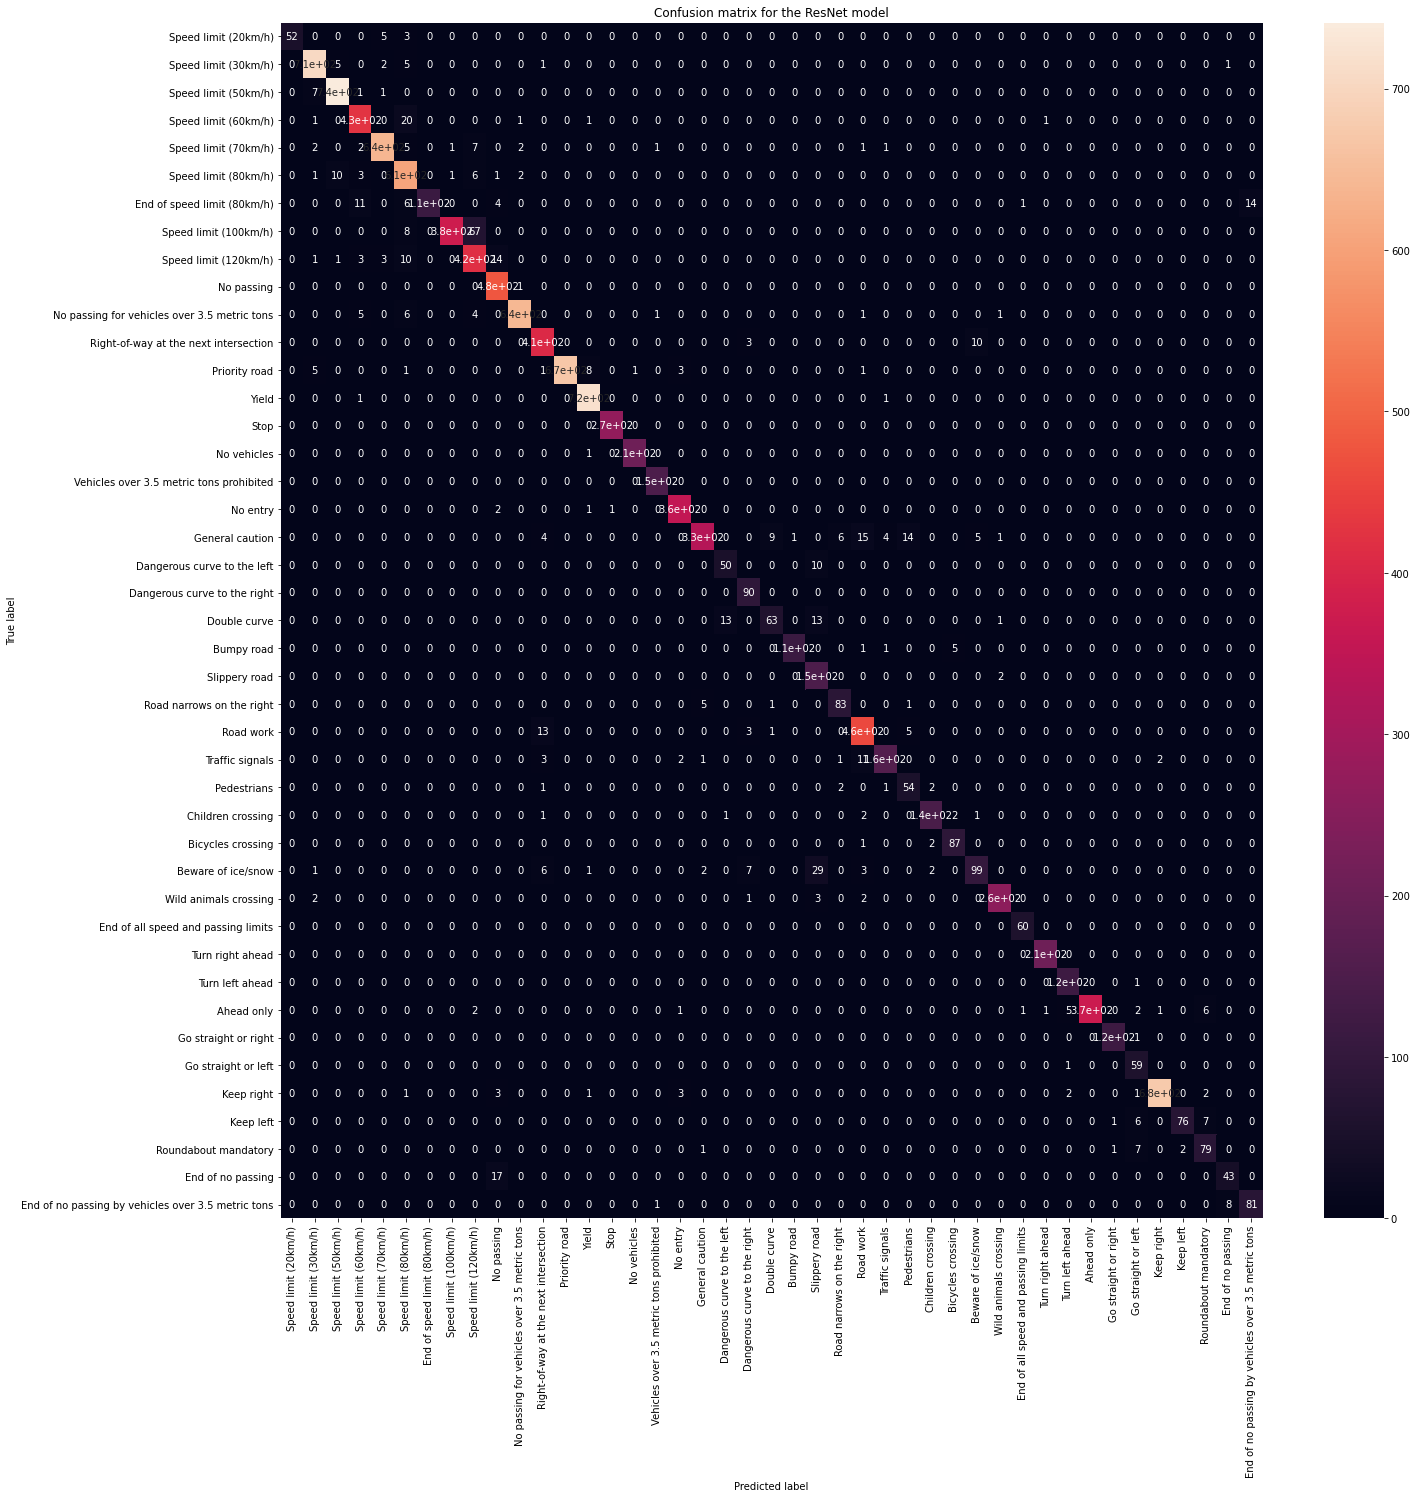

In [ ]:

cm = confusion_matrix(y_test, pred)
cm_df = pd.DataFrame(cm)
plt.figure(figsize=(22,22))

sns.heatmap(cm_df, annot=True,xticklabels=signNames, yticklabels=signNames)
plt.title('Confusion matrix for the ResNet model' )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## **Here we take a look a some of the misclassified samples**

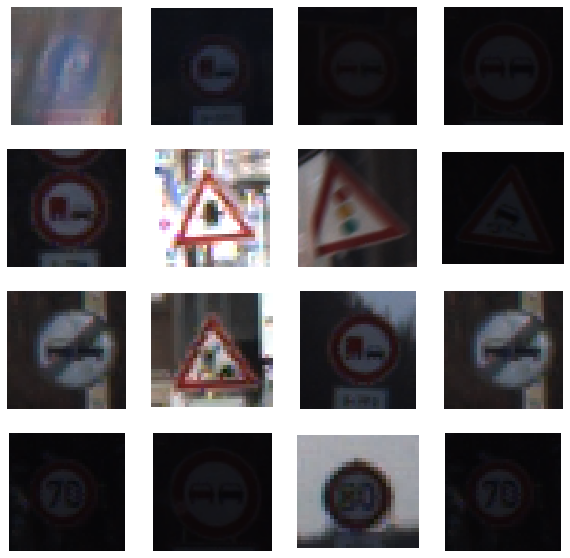

In [ ]:
bad_pred=np.where(y_test!=pred)[0]
w=12
h=12
fig=plt.figure(figsize=(10, 10))
columns = 4
rows = 4
o=[51,78,170,174]
l=[0,174,29,51,78,48, 73,77,89,125,117,119,125,170,78,134,170]
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    test_path="German_Traffic/Test/"
    img=test_path+os.listdir(test_path)[bad_pred[l[i]]]

    plt.imshow(plt.imread(img))
    
    plt.axis('off')   
plt.show()